## Image Segmentation-Dr N. Subhash Chandra

Image Segmentation helps to obtain the region of interest (ROI) from the image. 

It is the process of separating an image into different areas. The parts into which the image is divided are called Image Objects. It is done based on the image properties like similarity, discontinuity, etc. 

The goal of image segmentation is to simplify the image for better analysis. 

It is the process of assigning labels to every pixel in an image. 

## There are two forms of image segmentation:

Local segmentation – It is concerned with a specific area or region of the image.

Global segmentation – It is concerned with segmenting the entire image.

## Types of image segmentation

The various types include,

Semantic segmentation

This process associates each pixel to a class, for instance, flower, road, car, etc. Hence, all pixels of a car present in an image are assigned to the class “car” i.e. a common representation. Automated driving uses this type of image segmentation.

Instance segmentation

This goes a bit further by representing each pixel to an instance object on the image. Therefore each object is a unique object. Real-time road signs are instance segmented in automated driving systems.

Panoptic segmentation

A combination of instance and semantic segmentation gives more details.

## Point processing on Imge

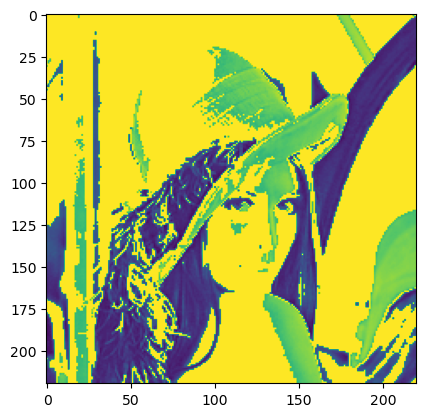

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Image negative
img = cv2.imread('Lenna_(test_image).png',0)

m,n = img.shape

L = img.max()

img_neg = L-img

# convert the np array img_neg to
# a png image
cv2.imwrite('Lenna_(test_image).png', img_neg)
plt.imshow(img_neg)

# Thresholding without background
# Let threshold =T
# Let pixel value in the original be denoted by r
# Let pixel value in the new image be denoted by s
# If r<T, s= 0
# If r>T, s=255

T = 150

# create a array of zeros
img_thresh = np.zeros((m,n), dtype = int)

for i in range(m):

    for j in range(n):

        if img[i,j] < T:
            img_thresh[i,j]= 0
        else:
            img_thresh[i,j] = 255


# Convert array to png image
cv2.imwrite('Lenna_(test_image).png', img_thresh)
plt.imshow(img_thresh)
# the lower threshold value
T1 = 100

# the upper threshold value
T2 = 180

# create a array of zeros
img_thresh_back = np.zeros((m,n), dtype = int)

for i in range(m):

    for j in range(n):

        if T1 < img[i,j] < T2:
            img_thresh_back[i,j]= 255
        else:
            img_thresh_back[i,j] = img[i,j]

# Convert array to png image
cv2.imwrite('Lenna_(test_image).png', img_thresh_back)
plt.imshow(img_thresh_back)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Line detection by canny filter and Hough transform

## Image segmentation algorithms

Different image segmentation algorithms like- 
Otsu’s segmentation,
Edge-based segmentation algorithms, 
Region-based segmentation algorithms, 
Clustering-based segmentation algorithms, 
Neural networks for segmentation, and 
Watershed segmentation algorithms.

## Edge-based image segmentation algorithms
In this method, an edge filter is applied to the image. The image pixels are then classified as edge or non-edge depending on the filter output. Edge detection helps to remove unwanted and unnecessary information from the image.

It includes 2 steps- Edge detection and edge linking.

The different types of edge detection operators are:

i. Robert operator: It highlights regions of high spatial frequency

ii. Prewitt operator: It is used for detecting vertical and horizontal edges in images

iii. Sobel operator: It is used for detecting vertical and horizontal edges in images. Similar to Prewitt

## Image segmentation by Hough transform

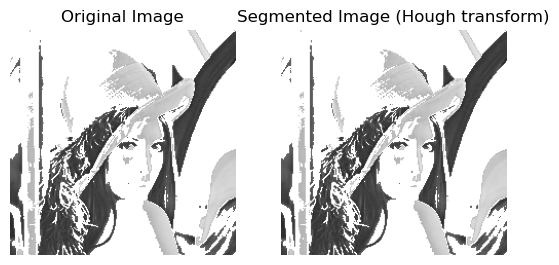

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Lenna_(test_image).png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Apply Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

# Draw detected lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image with detected lines
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (Hough transform)')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()



## Segmentation using Canny filter

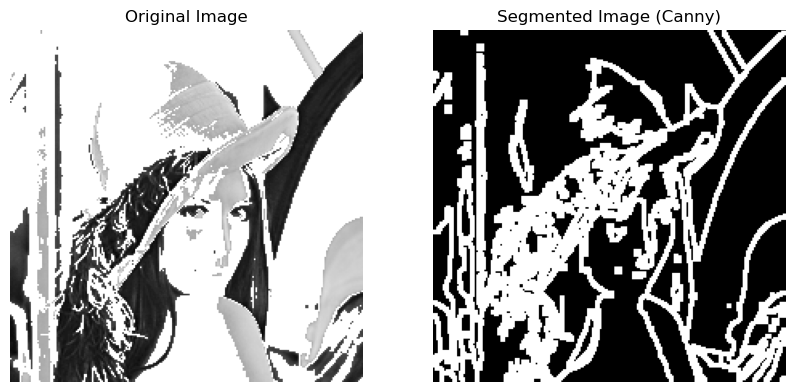

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)  # Adjust the threshold values as needed

# Dilate the edges to fill gaps
kernel = np.ones((3, 3), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

# Display original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (Canny)')
plt.imshow(dilated_edges, cmap='gray')
plt.axis('off')

plt.show()


## Image segmentation using sobel filter

Sobel Edge Detection
Sobel edge detector is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes.

The operator uses two 3X3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical. The picture below shows Sobel Kernels in x-dir and y-dir:

sobel horozontal -[1 2 1][0,0,0][-1,-2,-1]
Steps in method:
1. Import libraries
2. read image
3. Convert image to gray scale
4. define sobel filter
5. perform horizal and Vertical convolutions
6. show output

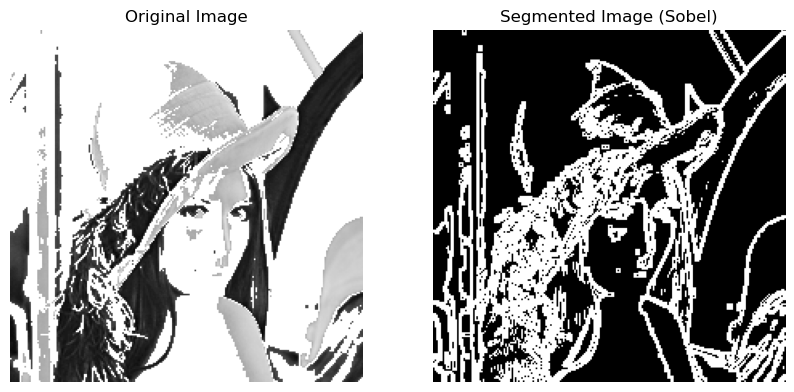

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter to get gradient magnitude
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Apply thresholding to segment the image
_, segmented_image = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)

# Display original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (Sobel)')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()


## Clustering-based image segmentation algorithms

It includes methods like fuzzy c-means, k-means, improved k-means, etc. Here we will take each point as a separate cluster and merge two clusters with the minimum inter-cluster distance. Repeat this step until clustering is satisfactory. 

Another approach is using K means algorithm where we select K points and assign them a cluster center by calculating the mean. Now, allocate other points nearest to the particular centers and form clusters. Repeat unlit the cluster centers don’t change.

## Neural networks for image segmentation


Segmentation may require large neural networks. CNN is most widely used for object detection, pattern recognition etc. It can even process large datasets. They are used for image segmentation due to their high accuracy. It works as a hierarchical model with various layers and results in a segmented image as the output.

## Segmentation Applications

Image segmentation has wide applications in Machine Learning, 
Computer Vision,  
Medical imaging, 
Recognition tasks, 
Video surveillance, 
Object detection, etc.
Healthcare
Space science.

## Image segmentation datasets

COCO Dataset - Common Objects in Context
PASCAL Visual Object Classes (PASCAL VOC)
Open Images V6
The Cityscapes Dataset

## Region-based segmentation: 


Here we grow the regions recursively by including the neighbour pixels which are similar and connected to that pixel, and we will use similarity measures for regions with homogeneous grey levels.

The process is iterated in the same way as any general data clustering algorithm.

Some of the advantages of this method include faster and easier computation, better performance, etc.

## Image segmentation using Region-based method : Region growing

Region-based approaches for image segmentation typically involve partitioning the image into regions based on certain criteria such as color similarity, texture similarity, or pixel intensity. One popular method is the Region Growing algorithm. 

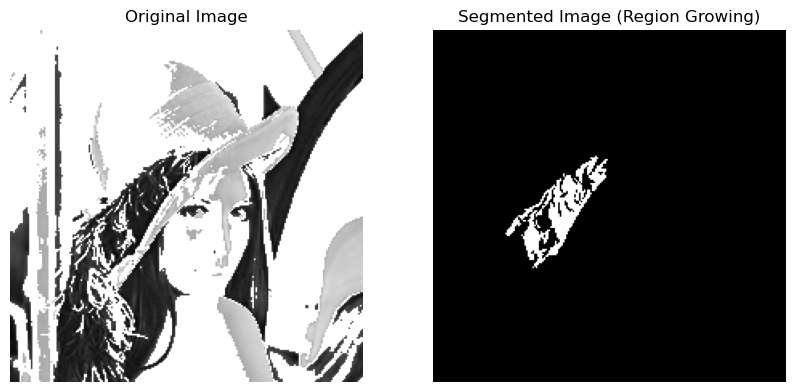

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed):
    # Create a mask and initialize it with zeros
    mask = np.zeros_like(image, dtype=np.uint8)
    
    # Create a queue to hold the seed points
    queue = []
    queue.append(seed)
    
    # Define the connectivity (4 or 8 neighbors)
    connectivity = 8
    
    # Get the seed pixel value
    seed_value = image[seed[1], seed[0]]
    
    # Iterate through the queue until it's empty
    while len(queue) > 0:
        # Get the current pixel coordinates
        current_point = queue.pop(0)
        
        # Add the current pixel to the mask
        mask[current_point[1], current_point[0]] = 255
        
        # Check the neighbors of the current pixel
        for i in range(-1, 2):
            for j in range(-1, 2):
                # Skip if out of bounds or if it's the current pixel
                if (current_point[0]+i < 0 or current_point[0]+i >= image.shape[1] or
                    current_point[1]+j < 0 or current_point[1]+j >= image.shape[0] or
                    (i == 0 and j == 0)):
                    continue
                
                # Check if the neighbor is unvisited and similar to the seed
                if (mask[current_point[1]+j, current_point[0]+i] == 0 and
                    abs(int(image[current_point[1]+j, current_point[0]+i]) - int(seed_value)) <= 20):
                    queue.append((current_point[0]+i, current_point[1]+j))
                    mask[current_point[1]+j, current_point[0]+i] = 255
    
    return mask

# Read the image
image = cv2.imread('Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

# Define seed point (you can manually select this point or use some other method)
seed_point = (100, 100)

# Perform region growing
segmented_image = region_growing(image, seed_point)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (Region Growing)')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()


## Image Segmentation using Otsu Thresholding

It comes under threshold-based segmentation. 
In Otsu’s Segmentation, 
1. The input image is first processed, 
2. Try to obtain the histogram of the image, which will show the distribution of pixels in the image. Here we focus on peak value. 
3. The next step is to compute the threshold value and compare it with the image pixels.
4. Set the pixel to white; if they are greater than the threshold else, set it to black.

Thus, it performs automatic thresholding. This method is not suitable for noisy images. Applications include scanning documents, recognizing patterns.

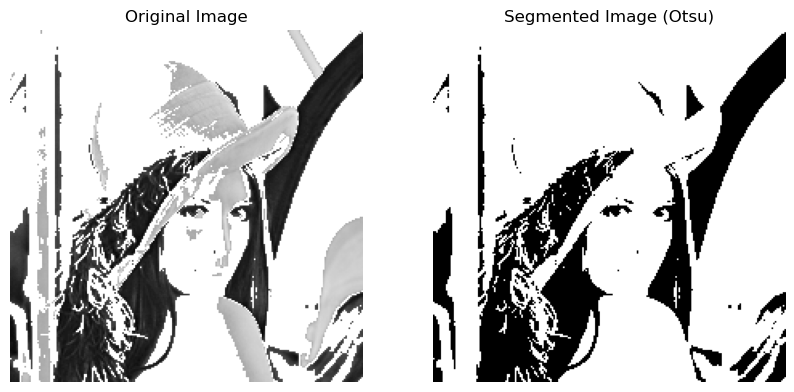

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('Lenna_(test_image).png', 0)

# Apply Otsu's thresholding
_, segmented_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (Otsu)')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()


## Image Segmentation using ML-K-means

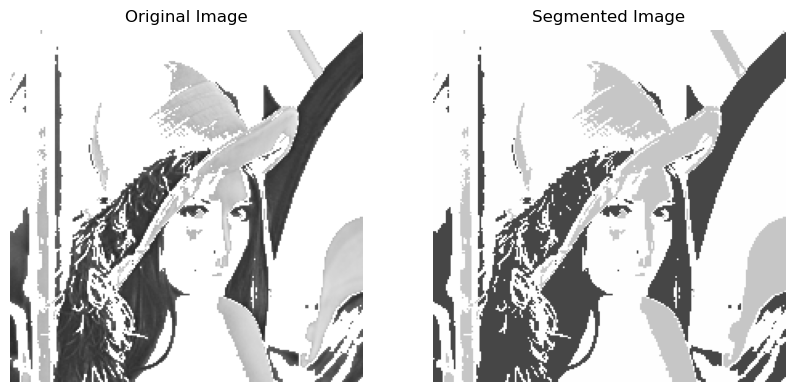

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Lenna_(test_image).png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert to float32
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 3  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape to original image shape
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()


## Image segmentation based on texture using ML - K means clustering

##Segmentation based on image texture can be approached using various techniques. One popular method involves using texture features extracted from the image, such as Local Binary Patterns (LBP), and then applying clustering algorithms like K-means to group similar texture regions. 

C:\Users\Subash Chandra\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\Subash Chandra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


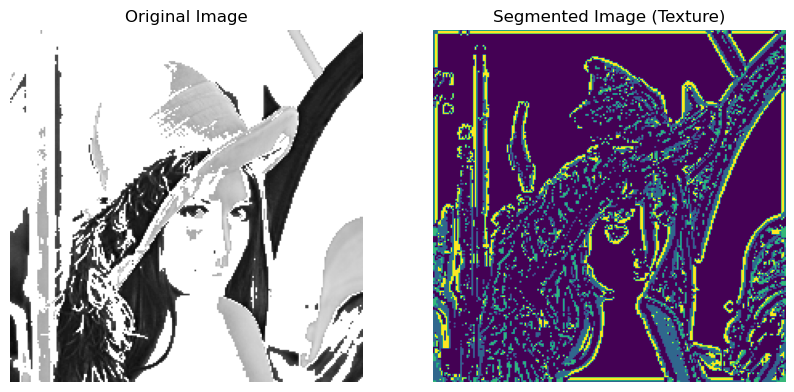

In [8]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

# Extract Local Binary Pattern (LBP) features
radius = 3
n_points = 8 * radius
lbp_image = local_binary_pattern(image, n_points, radius, method='uniform')

# Reshape LBP image for K-means clustering
rows, cols = lbp_image.shape
lbp_reshaped = np.reshape(lbp_image, (rows * cols, 1))

# Perform K-means clustering
num_clusters = 4  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(lbp_reshaped)
segmented_image = kmeans.labels_.reshape(rows, cols)

# Display original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (Texture)')
plt.imshow(segmented_image, cmap='viridis')
plt.axis('off')

plt.show()


## Image segmentation using ML : K means clustering based on colour

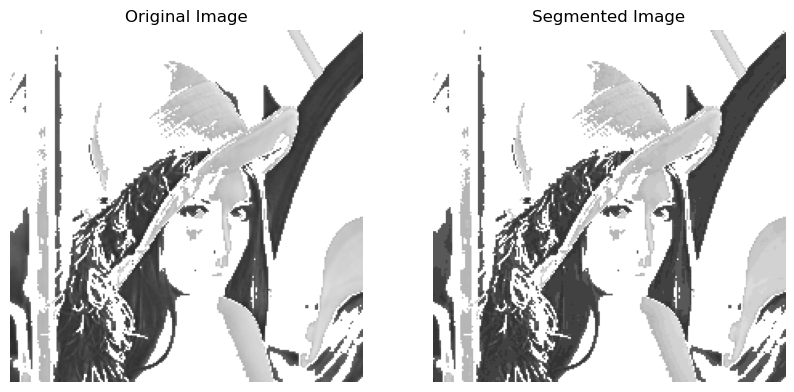

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Lenna_(test_image).png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert to float32
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 12  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape to original image shape
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()


## Image segmentation using Morphological operations 

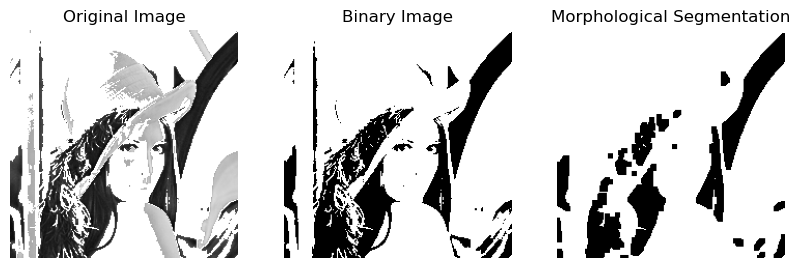

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Lenna_(test_image).png', 0)  # Read the image in grayscale

# Apply thresholding to binarize the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a kernel for morphological operations
kernel = np.ones((5,5), np.uint8)

# Perform morphological operations (erosion followed by dilation)
morph_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Morphological Segmentation')
plt.imshow(morph_image, cmap='gray')
plt.axis('off')

plt.show()


## Image segmentation by Thresholding

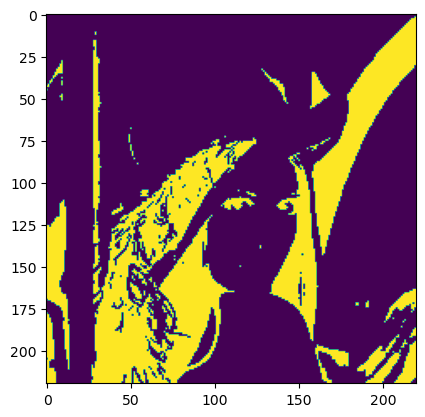

In [11]:
# Python program to transform an image using
# threshold.
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Image operation using thresholding
img = cv2.imread('Lenna_(test_image).png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY_INV +
            cv2.THRESH_OTSU)
#cv2.imshow('image', thresh)
plt.imshow(thresh)
cv2.waitKey(0)  
cv2.destroyAllWindows()


## Image segmentation using CNN




#using a CNN for semantic segmentation is the obvious choice. When using a CNN for semantic segmentation, the output is also an image rather than a fixed length vector.

the architecture of the model contains several convolutional layers, non-linear activations, batch normalization, and pooling layers. The initial layers learn the low-level concepts such as edges and colors and the later level layers learn the higher level concepts such as different objects.

At a lower level, the neurons contain information for a small region of the image, whereas at a higher level the neurons contain information for a large region of the image. Thus, as we add more layers, the size of the image keeps on decreasing and the number of channels keeps on increasing. The downsampling is done by the pooling layers.


##Importing Necessary Libraries: 
We import NumPy for numerical operations, Matplotlib for visualization, and Keras for building and training the CNN model.

Epoch 1/10
5/5 [==============================] - 35s 6s/step - loss: 0.4440 - accuracy: 0.7635 - val_loss: 0.2581 - val_accuracy: 0.9375
Epoch 2/10
5/5 [==============================] - 31s 6s/step - loss: 0.2656 - accuracy: 0.9375 - val_loss: 0.2627 - val_accuracy: 0.9375
Epoch 3/10
5/5 [==============================] - 31s 6s/step - loss: 0.2529 - accuracy: 0.9375 - val_loss: 0.2478 - val_accuracy: 0.9375
Epoch 4/10
5/5 [==============================] - 31s 6s/step - loss: 0.2451 - accuracy: 0.9375 - val_loss: 0.2406 - val_accuracy: 0.9375
Epoch 5/10
5/5 [==============================] - 30s 6s/step - loss: 0.2383 - accuracy: 0.9375 - val_loss: 0.2320 - val_accuracy: 0.9375
Epoch 6/10
5/5 [==============================] - 30s 6s/step - loss: 0.2310 - accuracy: 0.9375 - val_loss: 0.2225 - val_accuracy: 0.9375
Epoch 7/10
5/5 [==============================] - 29s 6s/step - loss: 0.2275 - accuracy: 0.9375 - val_loss: 0.2275 - val_accuracy: 0.9375
Epoch 8/10
5/5 [==================

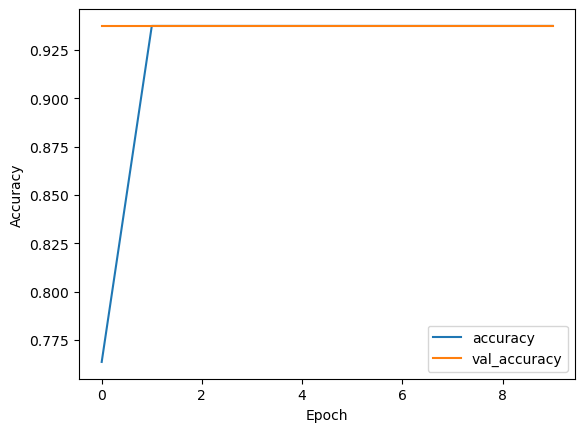

1/1 [==============================] - 2s 2s/step - loss: 0.2200 - accuracy: 0.9375
Validation loss: 0.22004055976867676, Validation accuracy: 0.9375
1/1 [==============================] - 0s 392ms/step


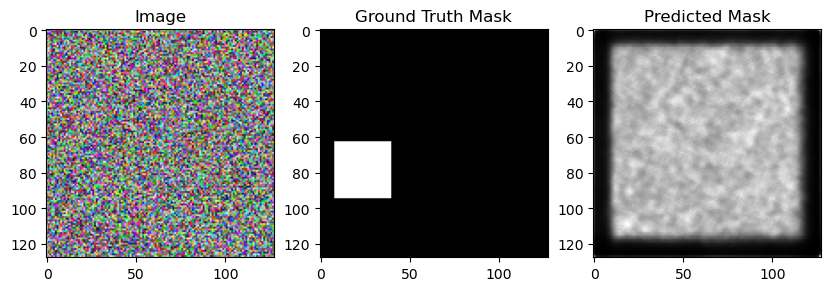

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Generate sample data
# Here you would typically load your own dataset
# For demonstration purposes, we'll generate synthetic data
# Replace this with your actual data loading code
def generate_data():
    # Generate synthetic images
    num_images = 100
    image_size = 128
    images = np.random.randint(0, 256, size=(num_images, image_size, image_size, 3), dtype=np.uint8)
    
    # Generate synthetic segmentation masks
    masks = np.zeros((num_images, image_size, image_size, 1), dtype=np.uint8)
    for i in range(num_images):
        # Randomly draw a rectangle as a segmentation mask
        x = np.random.randint(0, image_size - 32)
        y = np.random.randint(0, image_size - 32)
        masks[i, x:x+32, y:y+32, 0] = 1
    
    return images, masks

# Create CNN model for segmentation:  Model Architecture: 
#We define a sequential model using Keras. The model consists of several 
#convolutional layers followed by max-pooling layers for downsampling 
#and upsampling layers for upsampling. The final layer 
#uses a sigmoid activation function to produce binary segmentation masks.

def create_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv2)
    conv3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    pool2 = layers.MaxPooling2D((2, 2))(conv4)
    conv5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    upsample1 = layers.UpSampling2D((2, 2))(conv6)
    concat1 = layers.concatenate([conv4, upsample1], axis=-1)
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat1)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)
    upsample2 = layers.UpSampling2D((2, 2))(conv8)
    concat2 = layers.concatenate([conv2, upsample2], axis=-1)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(concat2)
    conv10 = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv9)
    model = keras.Model(inputs=inputs, outputs=conv10)
    return model

# Load data
images, masks = generate_data()

# Normalize images
images = images.astype('float32') / 255.0

# Split data into training and validation sets
split = int(0.8 * len(images))
train_images, val_images = images[:split], images[split:]
train_masks, val_masks = masks[:split], masks[split:]

# Create and compile the model
model = create_model(input_shape=train_images[0].shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_masks, epochs=10, batch_size=16, validation_data=(val_images, val_masks))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_images, val_masks)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_accuracy}')

# Example prediction
index = np.random.randint(0, len(val_images))
prediction = model.predict(np.expand_dims(val_images[index], axis=0))
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(val_images[index])
plt.title('Image')
plt.subplot(1, 3, 2)
plt.imshow(val_masks[index, :, :, 0], cmap='gray')
plt.title('Ground Truth Mask')
plt.subplot(1, 3, 3)
plt.imshow(prediction[0, :, :, 0], cmap='gray')
plt.title('Predicted Mask')
plt.show()


Segmentation Performance Metrics:

1. Pixel Accuracy
               = No of correctly classifed pixels/ Total No. of Pixels
2. Dice Coefficient
                = 2* intersection / ( grond truth + prediction)
                Also known as the F1 Score, it's the harmonic mean of precision and recall. It ranges from 0 to 1, where 1 indicates perfect overlap between the predicted and ground truth regions.

3. Jaccard Index (IOU)
The Jaccard index, also known as the intersection over union (IoU) score, measures the similarity between the ground truth segmentation and the predicted segmentation.
The IoU score ranges from 0 to 1, with higher values indicating better segmentation performance. A value of 1 indicates a perfect overlap between the ground truth and predicted segmentations. 

                   = intersection/ (ground truth + predicted-intersection)
                   

## Code for Performance metrics

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix

def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def calculate_dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    dice_coefficient = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice_coefficient

def calculate_precision_recall(y_true, y_pred):
    true_positive = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    false_positive = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    false_negative = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    
    return precision, recall

# Example usage:
# Assuming y_true and y_pred are binary segmentation masks of the same size
y_true = np.array([[0, 1, 0, 0],
                   [1, 1, 1, 1],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0]])

y_pred = np.array([[0, 1, 0, 0],
                   [1, 0, 1, 0],
                   [0, 1, 0, 1],
                   [0, 0, 0, 0]])

iou = calculate_iou(y_true, y_pred)
dice_coefficient = calculate_dice_coefficient(y_true, y_pred)
precision, recall = calculate_precision_recall(y_true, y_pred)

print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)
print("Precision:", precision)
print("Recall:", recall)


Intersection over Union (IoU): 0.5
Dice Coefficient: 0.6666666666666666
Precision: 0.8
Recall: 0.5714285714285714


Thank You--